In [3]:
import pandas as pd 
import spotipy 
import requests
from bs4 import BeautifulSoup
from spotipy.oauth2 import SpotifyClientCredentials
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
import wave 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Spotify API Info:
SPOTIPY_CLIENT_ID = 'e6f6bd4e48824ac49e7251d95ddd2821'
SPOTIPY_CLIENT_SECRET = '9767fb7bd5734b3c8c68e3f7ef508dc9'


In [ ]:
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
#loading data of top artists
top_3000_artists = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cuetessa_project/Top_3000_artists.csv')
top_3000_artists.drop_duplicates()
top_3000_artists.dropna()
print(top_3000_artists.head())

                name
0             Adele 
1       Joey + Rory 
2   Draaco Aventura 
3     Justin Bieber 
4   Peer van Mladen 


In [ ]:
def remove_endbeg_whitespace(row):
    artist = row['name']

    artist = artist.strip()
    return artist

top_3000_artists['artist_name'] = top_3000_artists.apply(remove_endbeg_whitespace,axis=1)
top_3000_artists.drop(columns= 'name', inplace=True)
top_3000_artists.head()

,artist_name
0,Adele
1,Joey + Rory
2,Draaco Aventura
3,Justin Bieber
4,Peer van Mladen


In [ ]:
top_3000_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  2992 non-null   object
dtypes: object(1)
memory usage: 23.5+ KB


In [ ]:
# getting top 10 songs from artists from Spotify 

artists_list = top_3000_artists.artist_name.to_list()
artists_uris=[]
for artist_name in artists_list:
    artist_name = artist_name
    try:
        artists = sp.search(q='artist:' +artist_name, type ='artist', limit =1)
        artist_uri = artists['artists']['items'][0]['uri']
        artists_uris.append(artist_uri)
    except:
        artists_uris.append('not_available')

In [ ]:
top_3000_artists['artist_uris'] = artists_uris
top_3000_artists.head(15)

,artist_name,artist_uris
0,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY
1,Joey + Rory,spotify:artist:31Esw1yHgJZBPcRa4nUyTP
2,Draaco Aventura,spotify:artist:5DMdVqSQ0KOfCRPL7fRU4Z
3,Justin Bieber,spotify:artist:1uNFoZAHBGtllmzznpCI3s
4,Peer van Mladen,spotify:artist:0f4LCYJ0RohOZ4mnVBX6gO
5,Chris Janson,spotify:artist:60gmlHZmT16wiO9GiXKYK9
6,One Direction,spotify:artist:4AK6F7OLvEQ5QYCBNiQWHq
7,Drake,spotify:artist:3TVXtAsR1Inumwj472S9r4
8,Carrie Underwood,spotify:artist:4xFUf1FHVy696Q1JQZMTRj
9,Ed Sheeran,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V


In [ ]:
top_3000_artists =top_3000_artists.query('artist_uris !="not_available" & artist_name != "CRU"')
top_3000_artists.query('artist_uris !="not_available"')

,artist_name,artist_uris
0,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY
1,Joey + Rory,spotify:artist:31Esw1yHgJZBPcRa4nUyTP
2,Draaco Aventura,spotify:artist:5DMdVqSQ0KOfCRPL7fRU4Z
3,Justin Bieber,spotify:artist:1uNFoZAHBGtllmzznpCI3s
4,Peer van Mladen,spotify:artist:0f4LCYJ0RohOZ4mnVBX6gO
...,...,...
2985,Dallas Gordon,spotify:artist:0T12K3paFvH0yo1Mb7dxME
2986,"Crosby, Stills & Nash",spotify:artist:2pdvghEHZJtgSXZ7cvNLou
2987,"Crosby, Stills, Nash & Young",spotify:artist:1CYsQCypByMVgnv17qsSbQ
2989,Crystal Waters,spotify:artist:2sd9Q3r0Jhqpe3w9WVuG43


In [ ]:
artist_name_s1 = []
artist_uris_s1 = []
song_name_s1 = []
song_id_s1 = []
song_url_s1 = []

for uri in top_3000_artists.artist_uris.to_list():

    results = sp.artist_top_tracks(uri)

    for number in range(0,26):
        for track in results['tracks'][:number+1]:
            
            try:
                song_name_s1.append(results['tracks'][number]['name'])
                artist_uris_s1.append(uri)
                song_id_s1.append(results['tracks'][number]['id'])
                song_url_s1.append(results['tracks'][number]['preview_url'])
            except:
                song_name_s1.append('not_available')
                artist_uris_s1.append(uri)
                song_id_s1.append('not_available')
                song_url_s1.append('not_available')

In [ ]:
data = {'artist_uri' : artist_uris_s1,
        'song_name' : song_name_s1,
        'song_id' : song_id_s1,
        'song_preview_url' : song_url_s1}
data = pd.DataFrame(data)

In [ ]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28798 entries, 0 to 569566
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artist_uri        28798 non-null  object
 1   song_name         28798 non-null  object
 2   song_id           28798 non-null  object
 3   song_preview_url  24096 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [ ]:
data = data.query('song_name !="not_available"')

In [ ]:
#merging dataframes to get artists names 
top_3000_artists.columns = ['artist_name', 'artist_uri']

data = data.merge(top_3000_artists,on='artist_uri', how='outer')
data.head(20)

,artist_uri,song_name,song_id,song_preview_url,artist_name
0,spotify:artist:4dpARuHxo51G3z768sgnrY,Easy On Me,46IZ0fSY2mpAiktS3KOqds,https://p.scdn.co/mp3-preview/3ca514309c910bb7...,Adele
1,spotify:artist:4dpARuHxo51G3z768sgnrY,Oh My God,3Kkjo3cT83cw09VJyrLNwX,https://p.scdn.co/mp3-preview/52c6f8030e09af6b...,Adele
2,spotify:artist:4dpARuHxo51G3z768sgnrY,Set Fire to the Rain,73CMRj62VK8nUS4ezD2wvi,https://p.scdn.co/mp3-preview/42b2a3e0d9f67450...,Adele
3,spotify:artist:4dpARuHxo51G3z768sgnrY,Someone Like You,1zwMYTA5nlNjZxYrvBB2pV,https://p.scdn.co/mp3-preview/efbea515ba096982...,Adele
4,spotify:artist:4dpARuHxo51G3z768sgnrY,Rolling in the Deep,1c8gk2PeTE04A1pIDH9YMk,https://p.scdn.co/mp3-preview/a693acd1ffb1b2dd...,Adele
5,spotify:artist:4dpARuHxo51G3z768sgnrY,Love In The Dark,7B5Npv8NjjTCzk8PLpU66h,https://p.scdn.co/mp3-preview/8718b1a8993dd67f...,Adele
6,spotify:artist:4dpARuHxo51G3z768sgnrY,When We Were Young,7GgWAITsYJaRM3r50rfh5w,https://p.scdn.co/mp3-preview/7469b3ecabb09860...,Adele
7,spotify:artist:4dpARuHxo51G3z768sgnrY,Skyfall,6VObnIkLVruX4UVyxWhlqm,https://p.scdn.co/mp3-preview/5e432c783658b76f...,Adele
8,spotify:artist:4dpARuHxo51G3z768sgnrY,I Drink Wine,6v0UJD4a2FtleHeSYVX02A,https://p.scdn.co/mp3-preview/ce932ee1d3976f30...,Adele
9,spotify:artist:4dpARuHxo51G3z768sgnrY,Make You Feel My Love,5FgPwJ7Nh2FVmIXviKl2VF,https://p.scdn.co/mp3-preview/d1cee7c98d25a908...,Adele


In [ ]:
data = data.dropna()

In [ ]:
data = data[['song_name','song_id','song_preview_url','artist_name','artist_uri']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21693 entries, 0 to 26555
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   song_name         21693 non-null  object
 1   song_id           21693 non-null  object
 2   song_preview_url  21693 non-null  object
 3   artist_name       21693 non-null  object
 4   artist_uri        21693 non-null  object
dtypes: object(5)
memory usage: 1016.9+ KB


In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''

def add_dance(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['danceability']
    
  except:
    return 'not_available'

data['danceability'] = data.apply(add_dance, axis=1)
data.head()
'''

"\n\ndef add_dance(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['danceability']\n    \n  except:\n    return 'not_available'\n\ndata['danceability'] = data.apply(add_dance, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again in Drive
# ~ 28 mins to load
'''

def add_energy(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['energy']
    
  except:
    return 'not_available'

data['energy'] = data.apply(add_energy, axis=1)
data.head()

'''

"\n\ndef add_energy(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['energy']\n    \n  except:\n    return 'not_available'\n\ndata['energy'] = data.apply(add_energy, axis=1)\ndata.head()\n\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''
def add_key(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['key']
    
  except:
    return 'not_available'

data['key'] = data.apply(add_key, axis=1)
data.head()
'''

"\ndef add_key(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['key']\n    \n  except:\n    return 'not_available'\n\ndata['key'] = data.apply(add_key, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''

def add_loudness(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['loudness']
    
  except:
    return 'not_available'

data['loudness'] = data.apply(add_loudness, axis=1)
data.head()
'''

"\n\ndef add_loudness(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['loudness']\n    \n  except:\n    return 'not_available'\n\ndata['loudness'] = data.apply(add_loudness, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again On Drive
# 
'''


drive.mount('/content/gdrive', force_remount = True)

path = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'
data.to_csv(path+'songs_spotify_data.csv', index=None)
'''

"\n\n\ndrive.mount('/content/gdrive', force_remount = True)\n\npath = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'\ndata.to_csv(path+'songs_spotify_data.csv', index=None)\n"

In [ ]:
#saved as comment to avoid saving DataFrame again 
# 
'''


data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data.csv')
'''

"\n\n\ndata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data.csv')\n"

In [ ]:
#saved as comment to avoid saving DataFrame again On Drive 
# ~ 28 mins to load
'''


def add_mode(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['mode']
    
  except:
    return 'not_available'

data['mode'] = data.apply(add_mode, axis=1)
data.head()
'''

"\n\n\ndef add_mode(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['mode']\n    \n  except:\n    return 'not_available'\n\ndata['mode'] = data.apply(add_mode, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive

'''


drive.mount('/content/gdrive', force_remount = True)

path = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'
data.to_csv(path+'songs_spotify_data_1.csv', index=None)

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_1.csv')
'''

"\n\n\ndrive.mount('/content/gdrive', force_remount = True)\n\npath = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'\ndata.to_csv(path+'songs_spotify_data_1.csv', index=None)\n\ndata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_1.csv')\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''

def add_speechiness(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['speechiness']
    
  except:
    return 'not_available'

data['speechiness'] = data.apply(add_speechiness, axis=1)
data.head()
'''

"\n\ndef add_speechiness(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['speechiness']\n    \n  except:\n    return 'not_available'\n\ndata['speechiness'] = data.apply(add_speechiness, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive

'''

drive.mount('/content/gdrive', force_remount = True)

path = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'
data.to_csv(path+'songs_spotify_data_2.csv', index=None)

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_2.csv')
'''

"\n\ndrive.mount('/content/gdrive', force_remount = True)\n\npath = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'\ndata.to_csv(path+'songs_spotify_data_2.csv', index=None)\n\ndata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_2.csv')\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''

def add_acousticness(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['acousticness']
    
  except:
    return 'not_available'

data['acousticness'] = data.apply(add_acousticness, axis=1)
data.head()
'''

"\n\ndef add_acousticness(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['acousticness']\n    \n  except:\n    return 'not_available'\n\ndata['acousticness'] = data.apply(add_acousticness, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive

'''

drive.mount('/content/gdrive', force_remount = True)

path = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'
data.to_csv(path+'songs_spotify_data_3.csv', index=None)

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_3.csv')
'''

"\n\ndrive.mount('/content/gdrive', force_remount = True)\n\npath = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'\ndata.to_csv(path+'songs_spotify_data_3.csv', index=None)\n\ndata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_3.csv')\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''

def add_instrumentalness(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['instrumentalness']
    
  except:
    return 'not_available'

data['instrumentalness'] = data.apply(add_instrumentalness, axis=1)
data.head()
'''

"\n\ndef add_instrumentalness(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['instrumentalness']\n    \n  except:\n    return 'not_available'\n\ndata['instrumentalness'] = data.apply(add_instrumentalness, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive

'''

drive.mount('/content/gdrive', force_remount = True)

path = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'
data.to_csv(path+'songs_spotify_data_4.csv', index=None)

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_4.csv')
'''

"\n\ndrive.mount('/content/gdrive', force_remount = True)\n\npath = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'\ndata.to_csv(path+'songs_spotify_data_4.csv', index=None)\n\ndata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_4.csv')\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''

def add_liveness(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['liveness']
    
  except:
    return 'not_available'

data['liveness'] = data.apply(add_liveness, axis=1)
data.head()
'''

"\n\ndef add_liveness(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['liveness']\n    \n  except:\n    return 'not_available'\n\ndata['liveness'] = data.apply(add_liveness, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive

'''

drive.mount('/content/gdrive', force_remount = True)

path = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'
data.to_csv(path+'songs_spotify_data_41.csv', index=None)

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_41.csv')
'''

"\n\ndrive.mount('/content/gdrive', force_remount = True)\n\npath = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'\ndata.to_csv(path+'songs_spotify_data_41.csv', index=None)\n\ndata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_41.csv')\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''

def add_valence(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['valence']
    
  except:
    return 'not_available'

data['valence'] = data.apply(add_valence, axis=1)
data.head()
'''

"\n\ndef add_valence(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['valence']\n    \n  except:\n    return 'not_available'\n\ndata['valence'] = data.apply(add_valence, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive

'''

drive.mount('/content/gdrive', force_remount = True)

path = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'
data.to_csv(path+'songs_spotify_data_5.csv', index=None)

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_5.csv')
'''

"\n\ndrive.mount('/content/gdrive', force_remount = True)\n\npath = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'\ndata.to_csv(path+'songs_spotify_data_5.csv', index=None)\n\ndata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_5.csv')\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''

def add_tempo(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['tempo']
    
  except:
    return 'not_available'

data['tempo'] = data.apply(add_tempo, axis=1)
data.head()
'''

"\n\ndef add_tempo(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['tempo']\n    \n  except:\n    return 'not_available'\n\ndata['tempo'] = data.apply(add_tempo, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive

'''

drive.mount('/content/gdrive', force_remount = True)

path = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'
data.to_csv(path+'songs_spotify_data_6.csv', index=None)

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_6.csv')
'''

"\n\ndrive.mount('/content/gdrive', force_remount = True)\n\npath = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'\ndata.to_csv(path+'songs_spotify_data_6.csv', index=None)\n\ndata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_6.csv')\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''

def add_duration_ms(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['duration_ms']
    
  except:
    return 'not_available'

data['duration_ms'] = data.apply(add_duration_ms, axis=1)
data.head()
'''

"\n\ndef add_duration_ms(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['duration_ms']\n    \n  except:\n    return 'not_available'\n\ndata['duration_ms'] = data.apply(add_duration_ms, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive

'''

drive.mount('/content/gdrive', force_remount = True)

path = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'
data.to_csv(path+'songs_spotify_data_7.csv', index=None)

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_7.csv')
'''

"\n\ndrive.mount('/content/gdrive', force_remount = True)\n\npath = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'\ndata.to_csv(path+'songs_spotify_data_7.csv', index=None)\n\ndata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_7.csv')\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive
# ~ 28 mins to load
'''

def add_time_signature(row):
  url = row['song_id']
  track_features = sp.audio_features(url)
  try:
    return track_features[0]['time_signature']
    
  except:
    return 'not_available'

data['time_signature'] = data.apply(add_time_signature, axis=1)
data.head()
'''

"\n\ndef add_time_signature(row):\n  url = row['song_id']\n  track_features = sp.audio_features(url)\n  try:\n    return track_features[0]['time_signature']\n    \n  except:\n    return 'not_available'\n\ndata['time_signature'] = data.apply(add_time_signature, axis=1)\ndata.head()\n"

In [ ]:
#saved as comment to avoid saving DataFrame again on Drive

'''

drive.mount('/content/gdrive', force_remount = True)

path = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'
data.to_csv(path+'songs_spotify_data_8.csv', index=None)

'''

"\n\ndrive.mount('/content/gdrive', force_remount = True)\n\npath = 'gdrive/MyDrive/Colab Notebooks/cuetessa_project/'\ndata.to_csv(path+'songs_spotify_data_8.csv', index=None)\n\n"

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cuetessa_project/songs_spotify_data_8.csv')
data.drop_duplicates(inplace=True)
data.song_id.drop_duplicates(inplace=True)
data


,song_name,song_id,song_preview_url,artist_name,artist_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Easy On Me,46IZ0fSY2mpAiktS3KOqds,https://p.scdn.co/mp3-preview/3ca514309c910bb7...,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,0.604,0.366,5,-7.519,1,0.0282,0.578,0,0.133,0.13,141.981,224695,4
1,Oh My God,3Kkjo3cT83cw09VJyrLNwX,https://p.scdn.co/mp3-preview/52c6f8030e09af6b...,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,0.534,0.725,1,-3.906,1,0.046,0.091,0,0.0264,0.55,88.098,225149,4
2,Set Fire to the Rain,73CMRj62VK8nUS4ezD2wvi,https://p.scdn.co/mp3-preview/0cb5ff32482a53f6...,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,0.603,0.67,2,-3.882,0,0.0249,0.00408,1.68e-06,0.112,0.446,107.993,242974,4
3,Someone Like You,1zwMYTA5nlNjZxYrvBB2pV,https://p.scdn.co/mp3-preview/37a87f0774032965...,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,0.556,0.319,9,-8.251,1,0.0281,0.893,0,0.0996,0.294,135.187,285240,4
4,Rolling in the Deep,1c8gk2PeTE04A1pIDH9YMk,https://p.scdn.co/mp3-preview/afe09fc55b7ffc27...,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,0.73,0.769,8,-5.114,1,0.0298,0.138,0,0.0473,0.507,104.948,228093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23900,Megatron,1NcZGjLqdy6EjTikupoHsf,https://p.scdn.co/mp3-preview/266c44ac79a6ded2...,Crazy Town,spotify:artist:4iSKnRZAxkmqNok6tv10Se,0.756,0.782,7,-3.188,1,0.121,5.28e-05,0.036,0.047,0.588,128.021,221573,4
23901,GlitchGang (Remix),5RI73C2BN902ytbrFkXhm2,https://p.scdn.co/mp3-preview/abb371212c338560...,Crazy Town,spotify:artist:4iSKnRZAxkmqNok6tv10Se,0.691,0.915,0,-4.768,1,0.0559,0.0567,8.33e-06,0.282,0.818,110.069,144818,4
23902,Darkside,6pWfSngATxH5jhspudBbDv,https://p.scdn.co/mp3-preview/e960b014e2f8b4fd...,Crazy Town,spotify:artist:4iSKnRZAxkmqNok6tv10Se,0.733,0.817,8,-3.541,0,0.0506,0.00742,0,0.0766,0.604,110.988,232840,4
23903,Backpack,3rP37J9X3qMHk99IGYiy0P,https://p.scdn.co/mp3-preview/3e43355f5a5b379e...,Crazy Town,spotify:artist:4iSKnRZAxkmqNok6tv10Se,0.515,0.861,2,-4.647,1,0.318,0.00443,0,0.0836,0.442,155.728,255387,4


In [ ]:
import wave
source_audio = '/content/drive/MyDrive/Colab Notebooks/cuetessa_project/songs_url_preview/46IZ0fSY2mpAiktS3KOqds.wav'

In [ ]:

wave_x, sample_rate = librosa.load(source_audio)
ipd.Audio(wave_x, rate = sample_rate)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


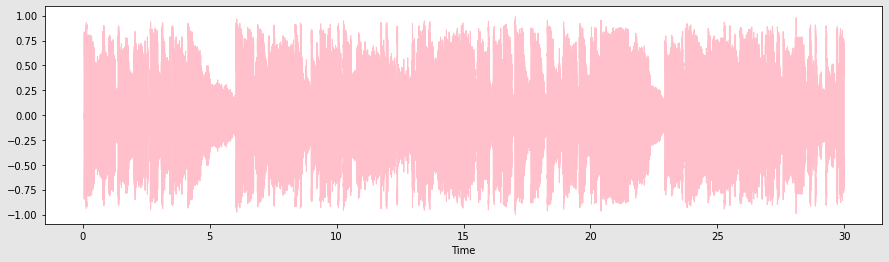

In [ ]:
plt.figure(figsize=(15,4), facecolor=(.9,.9,.9))
librosa.display.waveshow(wave_x, sr=sample_rate, color='pink')

In [ ]:
all_centroids = librosa.feature.spectral_centroid(wave_x,sr=sample_rate)

In [ ]:
all_centroids.shape

(1, 1292)

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(
    wave_x,sr=sample_rate, window='hann')[0]



In [ ]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [ ]:
#Normalizing spectral centroids for visualization 
def normalize(x, axis=0):
  return minmax_scale(x, axis = axis)


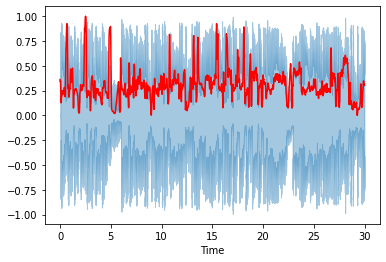

In [ ]:
#plotting spectral centroids along wave form
librosa.display.waveshow(wave_x, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids, axis =0), color='red')

In [ ]:
spectral_centroids.var()

881963.4019696639

In [ ]:
data.shape

(23836, 18)

In [ ]:
# adding mean, variance, and mean and variance of first order differences for spectral centroids

def spectral_cents(row):
  try:
    song_id = row['song_id']
    file_path = '/content/drive/MyDrive/Colab Notebooks/cuetessa_project/songs_url_preview/' + song_id +'.wav'
    wave_x, sample_rate = librosa.load(file_path)
    all_centroids = librosa.feature.spectral_centroid(wave_x,sr=sample_rate)[0]

    mean = all_centroids.mean()
    var = np.var(all_centroids)
  
    first_order_diff = np.diff(all_centroids)

    mean_first_order_diff = first_order_diff.mean()
    var_first_order_diff  = np.var(first_order_diff)

    return mean, var, mean_first_order_diff, var_first_order_diff
  except:
    mean = 'not_available'
    var ='not_available'

    mean_first_order_diff = 'not_available'
    var_first_order_diff  = 'not_available'

    return mean, var, mean_first_order_diff, var_first_order_diff
    



data[['mean_sp_cent', 'var_sp_cent', 'mean_1st_ordiff_sp_cent', 'var_1st_ordiff_sp_cent']] = data.apply(spectral_cents, axis = 1)
data.head()

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

In [ ]:
'/content/drive/MyDrive/Colab Notebooks/cuetessa_project/songs_url_preview/' + '001Oe305MoiNWa15mJdw9i' +'.wav'

In [ ]:
data.query('song_id =="59nOXPmaKlBfGMDeOVGrIK"')